c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\skimage\measure\simple_metrics.py:150: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


Original:          SSIM =  1.0        MSE =  0.0        PSNR =  inf


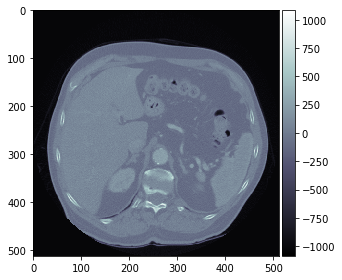

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import pydicom
import scipy.misc
import numpy as np
from skimage.measure import compare_ssim as ssim
from skimage.measure import compare_mse as mse
from skimage.measure import compare_psnr as psnr
from skimage import io, filters

%matplotlib inline

def compare_images(title, original, processed):
    mse_noise = mse(original, processed)
    ssim_noise = ssim(original, processed, data_range=processed.max() - processed.min())
    psnr_noise = psnr(original, processed)
    print(title, "        SSIM = ", ssim_noise, "       MSE = ", mse_noise, "       PSNR = ", psnr_noise)

# Any results you write to the current directory are saved as output.
lung = pydicom.read_file('c:/temp/000074.dcm')

# convert to HounsField Scale
image = np.stack(lung.pixel_array)

# Convert to int16 (from sometimes int16), 
# should be possible as values should always be low enough (<32k)
image = image.astype(np.int16)

# Set outside-of-scan pixels to 1
# The intercept is usually -1024, so air is approximately 0
image[image == -2000] = 0

intercept = lung.RescaleIntercept
slope = lung.RescaleSlope
    
if slope != 1:
	image = slope * image.astype(np.float64)
	image = image.astype(np.int16)
        
image += np.int16(intercept)
    
imgs = np.array(image, dtype=np.float64)

io.imshow(imgs, cmap=plt.cm.bone)
compare_images("Original: ", image, image)
    

Eroded:          SSIM =  0.5373313515497519        MSE =  17692.250633239746        PSNR =  53.85163524455474


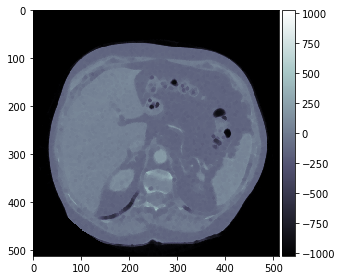

In [11]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk, star

selem = disk(3)
eroded = erosion(image, selem)
io.imshow(eroded, cmap=plt.cm.bone)
compare_images("Eroded: ", image, eroded)

Dilated:          SSIM =  0.5832270752786105        MSE =  19876.463897705078        PSNR =  53.34607483319832


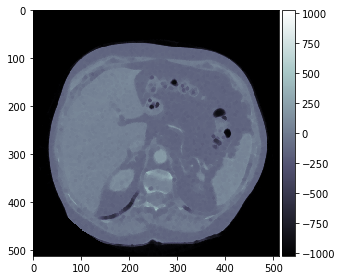

In [12]:
selem = disk(3)
dilated = dilation(image, selem)
io.imshow(eroded, cmap=plt.cm.bone)
compare_images("Dilated: ", image, dilated)

Opened:          SSIM =  0.6484274382418136        MSE =  4311.744972229004        PSNR =  59.98293541907731


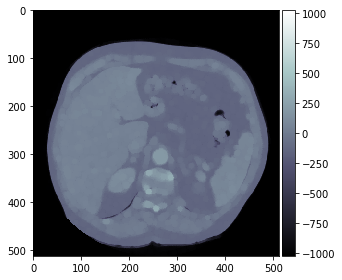

In [14]:
selem = disk(5)
opened = opening(image, selem)
io.imshow(opened, cmap=plt.cm.bone)
compare_images("Opened: ", image, opened)

Closed:          SSIM =  0.8945230609208636        MSE =  1143.2889366149902        PSNR =  65.74790606601697


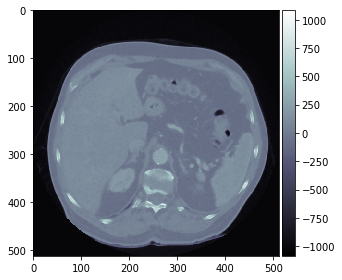

In [16]:
selem = disk(2)
closed = closing(image, selem)
io.imshow(closed, cmap=plt.cm.bone)
compare_images("Closed: ", image, closed)

c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\skimage\util\dtype.py:126: UserWarning: Possible sign loss when converting negative image of type int16 to positive image of type uint16.
  .format(dtypeobj_in, dtypeobj_out))
c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from int16 to uint16
  .format(dtypeobj_in, dtypeobj_out))
c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\skimage\measure\simple_metrics.py:133: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  warn("Inputs have mismatched dtype.  Setting data_range based on "


Exposure Adaptative Equalization:          SSIM =  1.4899269692412687e-05        MSE =  394181.3900550968        PSNR =  40.372504908523304


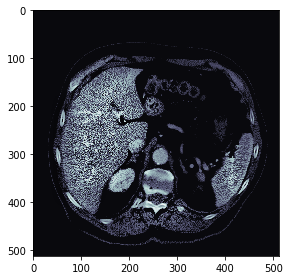

In [20]:
from skimage import exposure
img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.05)
io.imshow(img_adapteq, cmap=plt.cm.bone)
compare_images("Exposure Adaptative Equalization: ", image, img_adapteq)

c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


Gradient:          SSIM =  -0.019260097908252012        MSE =  494725.4093475342        PSNR =  39.38582391008985


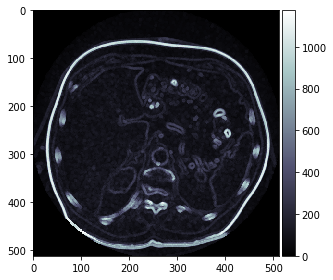

In [22]:
gradient = dilated - eroded
io.imshow(gradient, cmap=plt.cm.bone)
compare_images("Gradient: ", image, gradient)

Morphological Gradient after Adaptative Histogram:          SSIM =  0.13434518341332927        MSE =  0.024253915512327702        PSNR =  16.152181396131166


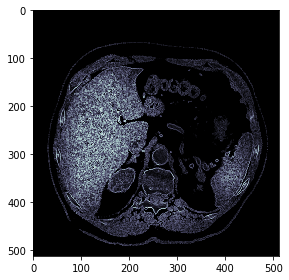

In [32]:
selem = disk(1)
eroded_adapteq = erosion(img_adapteq, selem)
dilated_adapteq = dilation(img_adapteq, selem)
gradient_adapteq = dilated_adapteq - eroded_adapteq
io.imshow(gradient_adapteq, cmap=plt.cm.bone)
compare_images("Morphological Gradient after Adaptative Histogram: ", img_adapteq, gradient_adapteq)

Morphological Gradient after Adaptative Histogram:          SSIM =  0.13434518341332927        MSE =  0.024253915512327702        PSNR =  16.152181396131166


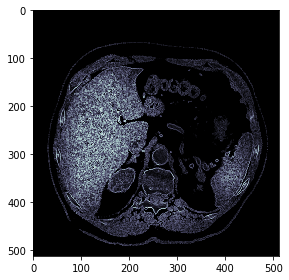

In [40]:
from skimage.morphology import diamond
selem = diamond(1)
eroded_adapteq = erosion(img_adapteq, selem)
dilated_adapteq = dilation(img_adapteq, selem)
gradient_adapteq = dilated_adapteq - eroded_adapteq
io.imshow(gradient_adapteq, cmap=plt.cm.bone)
compare_images("Morphological Gradient after Adaptative Histogram: ", img_adapteq, gradient_adapteq)

Opened after Adaptative Histogram Equalization:          SSIM =  0.8676882863182056        MSE =  0.005513422586141547        PSNR =  22.585787189671574


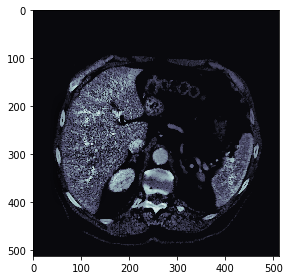

In [41]:
selem = disk(1)
opened_adapteq = opening(img_adapteq, selem)
io.imshow(opened_adapteq, cmap=plt.cm.bone)
compare_images("Opened after Adaptative Histogram Equalization: ", img_adapteq, opened_adapteq)

Closing after Adaptative Histogram Equalization:          SSIM =  0.9141814446420442        MSE =  0.005453334753711498        PSNR =  22.633378422677964


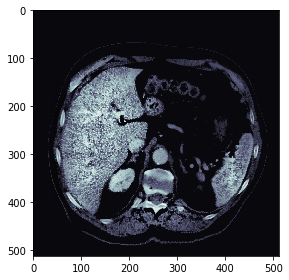

In [42]:
selem = disk(1)
closed_adapteq = closing(img_adapteq, selem)
io.imshow(closed_adapteq, cmap=plt.cm.bone)
compare_images("Closing after Adaptative Histogram Equalization: ", img_adapteq, closed_adapteq)